
                        
   
   # Movie Recommendation using Principal Component Analysis (PCA)



Project Summary: Developed a movie recommender system which help customers to access preferred movies intelligently from a huge movie library. The recommended movie list was created by the cumulative effect of ratings given by users.

Environment: Python 3 - Jupyter Notebook

Data Source: The data was collected from MovieLens, a working group of the University of Minessota’s GroupLens lab that aims to use the data from their movie recommendation site to develop new experimental tools and interfaces for data exploration and recommendation. I used two files movies.csv and rating.csv for the analysis. The rating file consisted of 100,000 ratings, which were assigned by 671 users on 9066 movies.
Link: https://grouplens.org/datasets/movielens/latest/

Machine Learning Techniques: I used Principal Component Analysis (PCA), which is a dimensionality reduction technique used to transform high-dimensional datasets into a dataset with fewer variables. These set of resulting variables explains the maximum variance within the dataset. In addition, I used Singular Value Decomposition (SVD) technique to decompose original rating matrix into sub-matrices that minimized the resulting approximation error.




## Import Libraries: ##

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Load Data: 

First, the data was downloaded using the pd.read_csv command to load the movies.csv ﬁle and stored the results in a pandas dataframe movies. The movies dataframe showed the title and genres of the movies that are to be rated. Used the head method to print the ﬁrst 5 rows of the movies dataframe.



In [11]:
# Read the movies  
movies = pd.read_csv("ml-latest-small/movies.csv") 
movies.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Data Preparation:

Extracted the following columns from the movies dataframe:
    1. Extracted the movieId column,converted to an np.array and stored in movie_ids
    2. Extracted the title column,converted to an np.array and stored in titles
    

In [12]:
movie_ids = np.array(movies.loc[:,"movieId"]) 
titles = np.array(movies.loc[:,"title"]) 

The following function (get_movie_title) returns the string of a movie title, given its movie id.


In [9]:
def get_movie_title(movie_id):     
    I = np.where(movie_ids == movie_id)[0]     
    if len(I) == 0:         
        return 'unknown'     
    else:         
        return titles[I[0]] 



Loaded the ratings.csv ﬁle into a pandas dataframe ratings. Used the head method to print the ﬁrst ﬁve rows of the dataframe.

In [10]:
ratings = pd.read_csv("ml-latest-small/ratings.csv") 
ratings.head() 

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Extracted three columns from the ratings dataframe: user_ids, user_movies and user_ratings with the user id, movie id and rating score and converted each to an np.array.

In [13]:
user_ids = np.array(ratings.loc[:,"userId"]) 
user_ratings = np.array(ratings.loc[:,"rating"]) 
user_movies = np.array(ratings.loc[:,"movieId"])


### Rating Matrix:

In [14]:
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating') 
movie_col = M.columns.tolist() 
user_row = M.index.tolist()


Displayed the data frame using the M.head() command.


In [15]:
M.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the entries are NaN since most of the movies were not rated. Used the fillna command to ﬁll in all the NaN entries with zeros. Stored the ﬁlled in dataframe in Mfill. Used the head method to print the ﬁrst ﬁve rows of the new dataframe.

In [16]:
Mfill = M.fillna(0) 
Mfill.head() 

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Converted Mfill to an np.array.

In [17]:
Mfill = np.array(Mfill) 
print(Mfill)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


Using the shape of Mfill, identified the number of users and movies.


In [18]:
Mfill.shape

(671, 9066)

## Principal Component Analysis of the Ratings Matrix:

First, created a matrix X formed by standardizing the matrix Mfill. Subtracted the mean and divided by the standard deviation of each column of Mfill.

In [30]:
# Standardize
Mmean = np.mean(Mfill, axis=0) 
Mstd = np.std(Mfill, axis=0) 
X = (Mfill-Mmean)/Mstd 
print(X) 
X.shape 

[[-0.72883611 -0.41931713 -0.29046057 ... -0.03863337 -0.03863337
  -0.03863337]
 [-0.72883611 -0.41931713 -0.29046057 ... -0.03863337 -0.03863337
  -0.03863337]
 [-0.72883611 -0.41931713 -0.29046057 ... -0.03863337 -0.03863337
  -0.03863337]
 ...
 [-0.72883611 -0.41931713 -0.29046057 ... -0.03863337 -0.03863337
  -0.03863337]
 [ 1.31632449 -0.41931713 -0.29046057 ... -0.03863337 -0.03863337
  -0.03863337]
 [ 1.82761464 -0.41931713 -0.29046057 ... -0.03863337 -0.03863337
  -0.03863337]]


(671, 9066)

The Singular Value Decomposition (SVD) is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. X is the real 671 x 9066 matrix that we wished to decompose, U is an 671x671 matrix, S is an 671x9066 diagonal matrix, and Vt is the  transpose of an 9066x9066 matrix. Used an SVD of X to perform the PCA. Used the np.linalg.svd method with full_matrices=False.

In [41]:
# svd (Singular Value Decomposition)
U,S,Vt = np.linalg.svd(X,full_matrices=False)
#print(S)

PoV (Proportion of variation) represents how much information of data will remain relatively to using all of them. If POV is high than less information will be lose. Plotted the proportion of variance as a function of the number of principal components (PCs).

671


Text(0,0.5,'PoV')

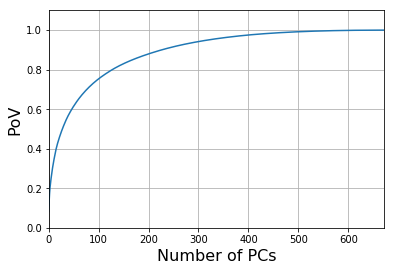

In [47]:
# Plot the PoV (Proportion of Variance) 
n_samples = X.shape[0] 
print(n_samples)
lam = S**2 
#print(lam)
PoV = np.cumsum(lam)/np.sum(lam) 
#print(PoV)

plt.plot(PoV) 
plt.grid() 
plt.axis([1,n_samples,0, 1.1]) 
plt.xlabel('Number of PCs', fontsize=16) 
plt.ylabel('PoV', fontsize=16)

## Making a Recommendation:

First, created a matrix Xest by taking a rank r=50 approximation of the original matrix X.


In [37]:
r=50 
Xest = (U[:,:r]*S[None,:r]).dot(Vt[:r,:]) 
#print(Xest)
print(np.linalg.matrix_rank(Xest))

50


Used the mean and standard deviation from the above for computing Mest.

In [23]:
Mest = np.zeros((Xest.shape[0], Xest.shape[1])) 
for i in range(0, Xest.shape[0]):     
    Mest[i,:] = (Xest[i,:]*Mstd[i])+ Mmean[i]

In [50]:
ind = 10   # Row index 
ntop = 20  # Print the ntop movie recommendations 
 
actual_rating = Mfill[ind,:] 
Rpre = np.sort(Mest[ind,:])[-ntop:] # 20 largest predicted rating 
Rpre_ind = np.argsort(Mest[ind,:])[-ntop:] #indexes of the 20 largest predicted rating 

Rtrue = [] 
tmp = [] 
for i in Rpre_ind:     
    Rtrue.append(actual_rating[i]) # the actual ratings of the 20 largest predicted ratings     
    tmp.append(movie_col[i]) # the movie title of the 20 largest predicted ratings 
 
for k in range(0, ntop):     
    print("Movie title: {0:s}".format(get_movie_title(tmp[k])))     
    print("Predicted Rating: {0:f} \n".format(Rpre[k]))     
   

Movie title: Still Breathing (1997)
Predicted Rating: 0.621914 

Movie title: Allnighter, The (1987)
Predicted Rating: 0.621914 

Movie title: Chasers (1994)
Predicted Rating: 0.621914 

Movie title: Doug's 1st Movie (1999)
Predicted Rating: 0.621914 

Movie title: The Machine (1994)
Predicted Rating: 0.621914 

Movie title: Rugrats Movie, The (1998)
Predicted Rating: 0.622717 

Movie title: Resident Evil: Retribution (2012)
Predicted Rating: 0.624128 

Movie title: Ghost Rider: Spirit of Vengeance (2012)
Predicted Rating: 0.624128 

Movie title: xXx: State of the Union (2005)
Predicted Rating: 0.624128 

Movie title: TMNT (Teenage Mutant Ninja Turtles) (2007)
Predicted Rating: 0.624128 

Movie title: Abduction (2011)
Predicted Rating: 0.624128 

Movie title: Diary of a Wimpy Kid (2010)
Predicted Rating: 0.624128 

Movie title: Paperboy, The (2012)
Predicted Rating: 0.624128 

Movie title: Drillbit Taylor (2008)
Predicted Rating: 0.624128 

Movie title: The Hunger Games (2012)
Predicte

The predicted rating is very low. This is because unknown entries were filled with zeros. 